# Import required packages

In [1]:
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('seaborn')

# Exercise 1

In [2]:
a_list = list(range(5))
b_list = a_list[1:4]

In [3]:
print(a_list)
print(b_list)

[0, 1, 2, 3, 4]
[1, 2, 3]


In [5]:
b_list[0] = 1000

In [6]:
print(a_list)
print(b_list)

[0, 1, 2, 3, 4]
[1000, 2, 3]


In [17]:
a_arr = np.array(list(range(5)))
b_arr = np.array(a_arr[1:4])

In [18]:
b_arr[0] = 1000

In [19]:
print(a_arr)
print(b_arr)

[0 1 2 3 4]
[1000    2    3]


# Exercise 2

In [27]:
n = 5
x = np.arange(1,n)
x

array([1, 2, 3, 4])

In [28]:
x.reshape(-1,2)

array([[1, 2],
       [3, 4]])

# Exercise 3

In [30]:
r = np.array([0.14,0.42,0.38,0.06]).reshape(-1,1)
r

array([[0.14],
       [0.42],
       [0.38],
       [0.06]])

In [31]:
f = np.array([
    [0.1,0.4, -0.3, 0.8],
    [-0.5,0.7,0.1,0.2],
    [-0.2,0.9,0.1,0.6],
    [-0.7,0.4,0.2,0.3]
    ])
f

array([[ 0.1,  0.4, -0.3,  0.8],
       [-0.5,  0.7,  0.1,  0.2],
       [-0.2,  0.9,  0.1,  0.6],
       [-0.7,  0.4,  0.2,  0.3]])

In [40]:
u = (r*f).sum(axis=0)
u

array([-0.314,  0.716,  0.05 ,  0.442])

In [37]:
i5 = np.array([0.1,0.6,0.2,0.7])
np.dot(u,i5)/(np.linalg.norm(u)*np.linalg.norm(i5))

0.8409221280593612

In [38]:
i6 = np.array([-0.8,0.2,0.5,0.1])
np.dot(u,i6)/(np.linalg.norm(u)*np.linalg.norm(i6))

0.5315866990762309

# Exercise 4 - Linear Regression Exercise

## Simulation of mock data 

Suppose the independent variable $x$ and the response variable $y$ follow a linear relationship, i.e.:

$$ y  = \mathbf{\beta}^\top \cdot \mathbf{x} = \beta_0 + \beta_1 x$$

where

$$
\mathbf{\beta}
=
\begin{bmatrix} 
\beta_0 \\
\beta_1
\end{bmatrix} 
\text{     and,    } 
\mathbf{x}
=
\begin{bmatrix} 
1 \\
x
\end{bmatrix} 
$$


$\beta_0$ is the intercept term and $\beta_1$ is the slope term.

We want to create some mock data $(X,Y)$ of $N=1000$ data points with certain amount of Gaussian noise $\epsilon \sim \mathcal{N} (0,1) $.


Where 

$$
X
=
\begin{bmatrix}
\mathbf{x_1}, 
\mathbf{x_2}, 
\cdots,
\mathbf{x_N}
\end{bmatrix}
=
\begin{bmatrix}
1 & 1& & 1\\
& &\cdots &\\
x_1 & x_2& & x_N
\end{bmatrix}
\text{         and ,     }
Y
=
\begin{bmatrix}
y_1,
y_2,
\cdots,
y_N
\end{bmatrix}
$$




and

$$ y_i = \mathbf{\beta}^\top \cdot \mathbf{x}_i + \epsilon_i = \beta_0 + \beta_1 x_i + \epsilon_i $$ for $i=1 \ldots N$


Let's assume $\beta_0 = 3$ and $\beta_1 = 10$.

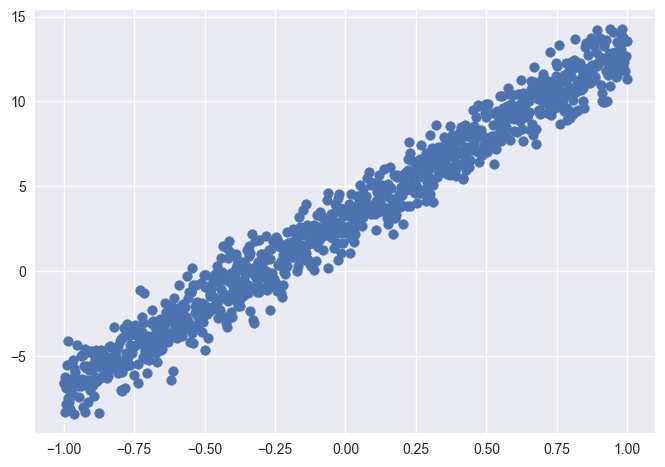

In [41]:
N = 1000 #sample size

true_beta = np.array([3,10])
x = np.linspace(-1,1,N)
x1 = np.vstack([np.ones(x.shape), x])

eps = np.random.normal(0,1,N)

y = np.matmul(true_beta, x1) + eps

plt.scatter(x,y)

## Linear Regression

Suppose that we know $x$ and $y$ follow a linear relationship, but we do not know the value of $\mathbf{\beta}$. 
We want to build a linear model $f(\mathbf{x}; \beta)$ and estimate the value of $\mathbf{\beta}$ from data samples $(x_i,y_i)$, so that given any input $\mathbf{x}_i$, we can make a prediction $\hat{y_i}$:


$$ \hat{y_i} = f(\mathbf{x}_i; \beta) = \mathbf{\beta}^\top \cdot \mathbf{x}_i  = \beta_0 + \beta_1 x_i  $$




Define the mean squared error loss function which measure the error between our predictions and the actual values:

$$ l = \frac{1}{N} \sum_{i=1}^{N} (y_i-\hat{y_i})^2 $$

We can estimate the value of $\beta$ by finding the minimizer which minimizes $l$ using the Newton-Raphson algorithm.

$$
\mathbf{\hat{\beta}}
=
\text{argmin}_\beta \   l(\beta)
$$

## Gradient and Hessian

To use the Newton-Raphson algorithm, we need to calculate the gradient and Hessian of the loss function, which are the first order and second order partial derivatives of the loss function respectively.

### The first order partial derivatives of the loss function are:

$$
\begin{align}
\frac{\partial l}{\partial \beta_0} &= -\frac{2}{N} \sum_{i=1}^N (y_i-\hat{y_i}) \\
\frac{\partial l}{\partial \beta_1} &= -\frac{2}{N} \sum_{i=1}^N x_i \cdot (y_i-\hat{y_i}) 
\end{align}
$$

### The gradient of the loss function is: 

$$
\nabla l
=
\begin{bmatrix} 
\frac{\partial l}{\partial \beta_0} \\ 
\frac{\partial l}{\partial \beta_1}
\end{bmatrix}
= 
-2 \cdot
\begin{bmatrix} 
\frac{1}{N} \sum_{i=1}^N (y_i -\hat{y_i}) \\ 
\frac{1}{N} \sum_{i=1}^N x_i \cdot (y_i -\hat{y_i})
\end{bmatrix}
$$

### The second order partial derivatives of the loss function are:

$$ 
\begin{align}
\frac{\partial^2 l}{\partial \beta_0^2} &= 2 \\
\frac{\partial^2 l}{\partial \beta_1^2} &=  \frac{2}{N} \sum_{i=1}^N x_i^2 \\
\frac{\partial^2 l}{\partial \beta_0 \partial \beta_1}  
&=  
\frac{\partial^2 l}{\partial \beta_1 \partial \beta_0}
=
\frac{2}{N} \sum_{i=1}^N x_i 
\end{align}
$$

### The Hessian of the loss function is: 

$$ 
H 
= 
\begin{bmatrix} 
\frac{\partial^2 l}{\partial \beta_0^2} & \frac{\partial^2 l}{\partial \beta_0 \partial \beta_1} \\ \frac{\partial^2 l}{\partial \beta_1 \partial \beta_0} & \frac{\partial^2 l}{\partial \beta_1^2} 
\end{bmatrix} 
= 
2 \cdot
\begin{bmatrix}
1 & \frac{1}{N} \sum_{i=1}^N x_i \\
\frac{1}{N} \sum_{i=1}^N x_i & \frac{1}{N} \sum_{i=1}^N x_i^2
\end{bmatrix}
$$

## Newton-Raphson Algorithm (2nd Order Optimization)








Define the functions for our linear model and the loss function

In [ ]:
# Define the function for our linear model
def model(param,x1):
    return

# Define the function for our loss function
def loss_func(param, x1, y): 
    return 

Newton-Raphson algorithm:

1. Initialize $\mathbf{\beta}$ by sampling from the standard normal distribution  $\mathcal{N} (0,1)$ 



2. At each iteration $k$, update the parameters $\mathbf{\beta}$ by this equation: \
   $$ \mathbf{\beta_{k+1}} = \mathbf{\beta_k} - H^{-1} \mathbf{\nabla} l(\beta_k) $$
     
     
3. Stop the algorithm when $|l(\beta_{k+1}) - l(\beta_k)| < \text{tolerance}$, we can use a small number, i.e. $10^{-7}$, as our tolerance value 


Hint:
1. You can use np.abs(delta) to compute the absolute value of delta


In [ ]:
beta = np.random.normal(0,1,2) #initialize beta
tol = 1e-7 #toloerance
delta = 1 #a variable to store the value for l(\beta_{k+1}) - l(\beta_{k}), initialized to be 1





## Visualizing the result

In [ ]:
print('The estimated value for beta is:', beta)
print('The true value for beta is:', true_beta)

y_pred = np.matmul(beta,x1)

plt.plot(x, y_pred, 'r')
plt.scatter(x,y)
plt.ylabel('y')
plt.xlabel('x')
plt.show()

## Gradient Descent Algorithm (1st Order Optimization) [Optional Exercise]

Gradient descent algorithm:


1. Initialize $\mathbf{\beta}$ by sampling from the standard normal distribution  $\mathcal{N} (0,1)$ 



2. At each iteration $k$, update the parameters $\mathbf{\beta}$ by this equation: \
   $$ \mathbf{\beta_{k+1}} = \mathbf{\beta_k} - \alpha \mathbf{\nabla} l(\beta_k) $$
   where $\alpha \sim 10^{-1}$ is the step size



3. Stop the algorithm when $|l(\beta_{k+1}) - l(\beta_k)| < \text{tolerance}$, we can use a small number, i.e. $10^{-7}$, as our tolerance value 



In [ ]:
beta = np.random.normal(0,1,2)

alpha = 3e-1
tol = 1e-7
delta = 1




## Visualizing the result

In [ ]:
print('The estimated value for beta is:', beta)
print('The true value for beta is:', true_beta)

y_pred = np.matmul(beta,x1)

plt.plot(x, y_pred, 'r')
plt.scatter(x,y)
plt.ylabel('y')
plt.xlabel('x')
plt.show()